EDA and data cleaning

In [2]:
import os
import sys

In [3]:
def setup_project_path():
    """Set up the project path for imports and data access"""
    current_dir = os.getcwd()
    
    if 'jupyter_notebooks' in current_dir:
        os.chdir(os.path.dirname(current_dir))
        print("Changed to project root directory")
    else:
        print("No 'jupyter_notebooks' directory found the the current path")
    
    # Add project root to Python path for imports
    project_root = os.getcwd()
    if project_root not in sys.path:
        sys.path.insert(0, project_root)
    
    return os.getcwd()


Load Data

In [4]:
from pathlib import Path
import pandas as pd

root = setup_project_path()
file_path = Path(root) / "outputs" / "datasets" / "collection" / "loan_approval.csv"

if not file_path.exists():
    raise FileNotFoundError(f"Dataset not found at: {file_path}")

df = pd.read_csv(file_path).drop(['name'], axis=1)
df.head(3)


Changed to project root directory


,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810,389,39698,27,50.0,False
1,New Jamesside,44592,729,15446,28,55.0,False
2,Lake Roberto,33278,584,11189,13,45.0,False


In [ ]:
Data Exploration

In [5]:
%pip uninstall -y numpy
%pip install numpy==2.1
%pip install -U numba ydata-profiling


Found existing installation: numpy 2.1.0
Uninstalling numpy-2.1.0:
  Successfully uninstalled numpy-2.1.0
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.0 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached numba-0.62.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.45.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (4.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

In [6]:
approve_counts = df['loan_approved'].value_counts()
approve_counts

loan_approved
False    1121
True      879
Name: count, dtype: int64

In [7]:
percentage_approved = df['loan_approved'].value_counts(normalize=True) * 100
percentage_approved

loan_approved
False    56.05
True     43.95
Name: proportion, dtype: float64

There is a moderate difference imbalance between loan approvals with false having a higher proportion meaning some models may be biased towards the rejection of loan approvals. The variables are split by 5 numbers, text and a boolean.

Correlation study

In [8]:
%pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [9]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(10)

(2000, 1888)


,income,credit_score,loan_amount,years_employed,points,loan_approved,city_East Jill,city_New Jamesside,city_Lake Roberto,city_West Melanieview,...,city_South Kenneth,city_Cookshire,city_Jenniferstad,city_Basston,city_Tylertown,city_Robertton,city_New Frank,city_East Haley,city_Adamland,city_New Nathantown
0,113810,389,39698,27,50.0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44592,729,15446,28,55.0,False,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33278,584,11189,13,45.0,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,127196,344,48823,29,50.0,False,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,66048,496,47174,4,25.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,62098,689,19217,29,65.0,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,59256,373,40920,40,35.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,48289,524,45866,20,25.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,126530,367,14826,36,55.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,43434,446,18359,8,20.0,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
corr_spearman = df_ohe.corr(method='spearman')['loan_approved'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

points                0.862704
credit_score          0.713124
income                0.237363
loan_amount          -0.158243
years_employed        0.104049
city_West Robert      0.035729
city_Maryfort         0.035729
city_North Jeffery    0.035729
city_Port Amber       0.035729
city_East Jennifer    0.035729
Name: loan_approved, dtype: float64

In [11]:
corr_pearson = df_ohe.corr(method='pearson')['loan_approved'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

points                   0.821415
credit_score             0.715788
income                   0.238066
loan_amount             -0.157859
years_employed           0.104408
city_Elizabethland       0.035729
city_Port John           0.035729
city_Michelletown        0.035729
city_Port Michaeltown    0.035729
city_North Jeffery       0.035729
Name: loan_approved, dtype: float64

Spearman correlation measures monotonic relationships, in which variables move in the same direction but not nexessarily lineear.
Pearson method measures linear relationships, in which 1 is a positive correlation and -1 is a negative correlation.
In the spearman correlation the variable points and credit score have a strong positive correlation suggesting as points increase so does loan approval.
income and loan_amount had a weak correlation and years_employed had a very weak correlation. This would suggest a higher income and lower loan amount would increase loan approval with more year employed slightly improving chances of approval.
The city variable has an extremely weak correlation and has little effect on loan approval. 

Pearson correlation showed a similiar pattern where points and credit score had a strong positive correlation and income had a very weak correlation.

In [12]:
vars_to_study = ['points', 'credit_score', 'income', 'loan_amount', 'years_employed']
vars_to_study

['points', 'credit_score', 'income', 'loan_amount', 'years_employed']

EDA on selected variables

In [13]:
df_eda = df.filter(vars_to_study + ['loan_approved'])
df_eda.head(3)

,points,credit_score,income,loan_amount,years_employed,loan_approved
0,50.0,389,113810,39698,27,False
1,55.0,729,44592,15446,28,False
2,45.0,584,33278,11189,13,False


Variables Distribution by loan approved

<Figure size 800x500 with 0 Axes>

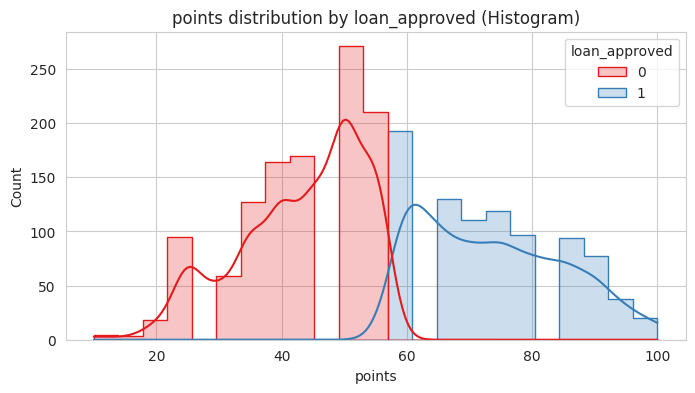

/tmp/ipykernel_697/2815583047.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




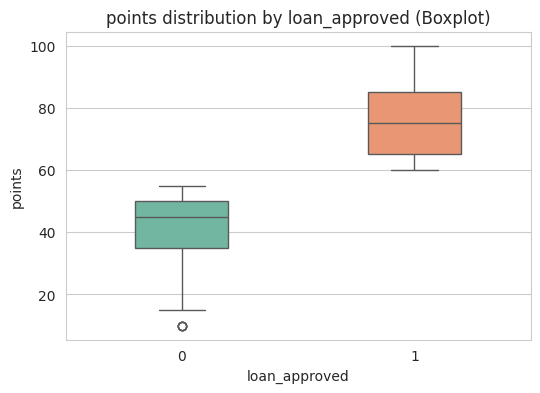

<Figure size 800x500 with 0 Axes>

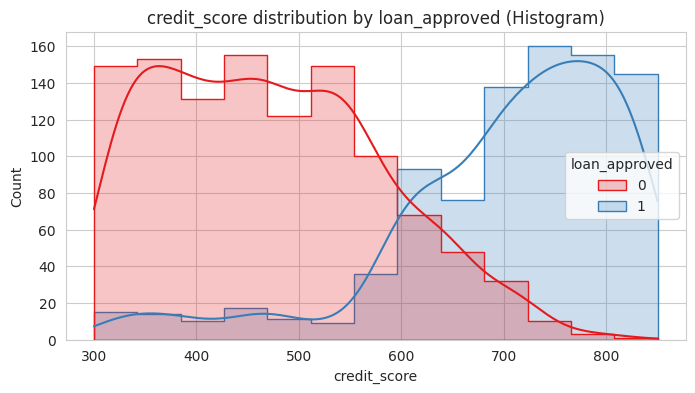

/tmp/ipykernel_697/2815583047.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




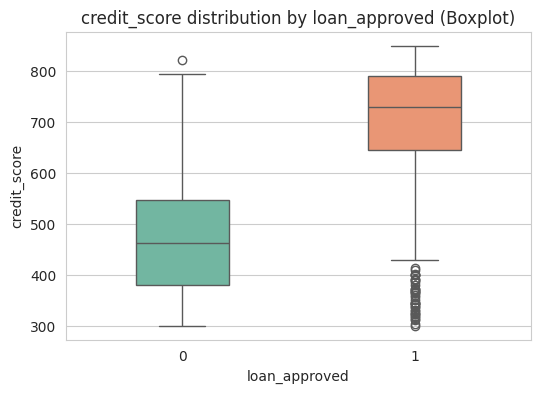

<Figure size 800x500 with 0 Axes>

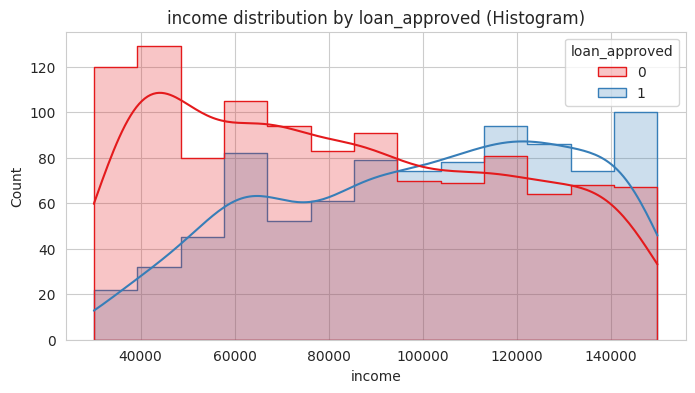

/tmp/ipykernel_697/2815583047.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




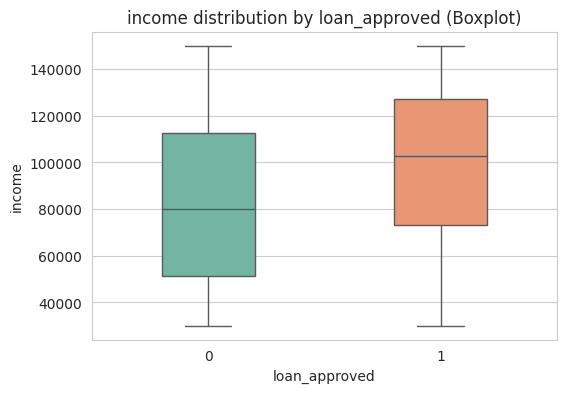

<Figure size 800x500 with 0 Axes>

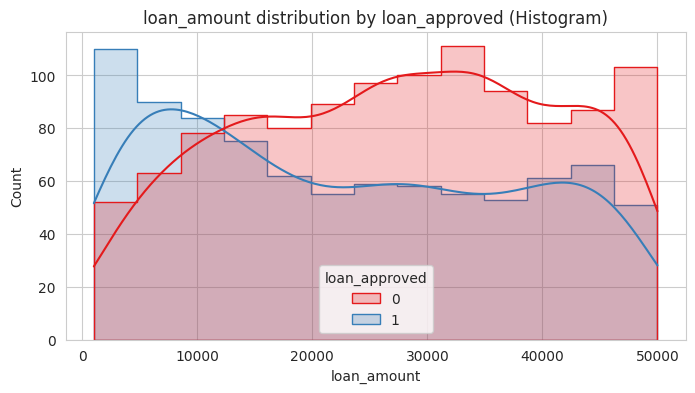

/tmp/ipykernel_697/2815583047.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




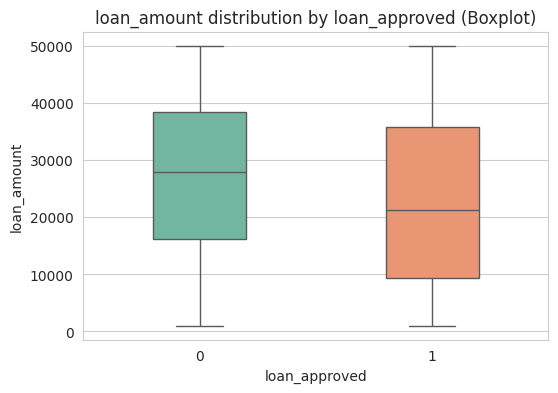

<Figure size 800x500 with 0 Axes>

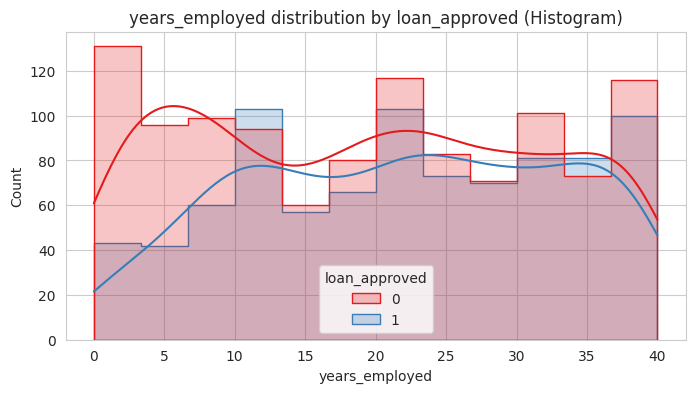

/tmp/ipykernel_697/2815583047.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




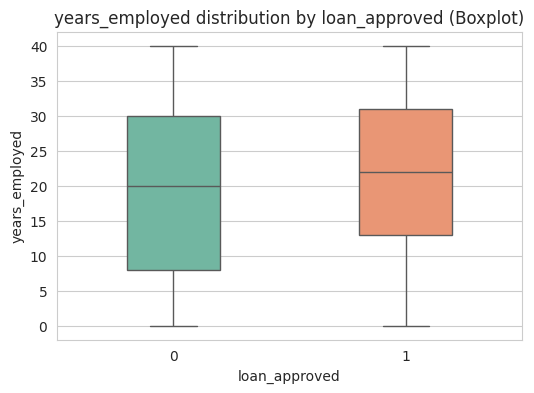

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))

    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step", palette='Set1')
    plt.title(f"{col} distribution by {target_var} (Histogram)")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=target_var, y=col, palette='Set2', width=0.4)
    plt.title(f"{col} distribution by {target_var} (Boxplot)")
    plt.show()

# Target variable
target_var = 'loan_approved'

# Convert target to integer
df_eda['loan_approved'] = df_eda['loan_approved'].astype(int)

# Plot all numerical features
for col in vars_to_study:
        plot_numerical(df_eda, col, target_var)

Points distribution by loan approved summary

This shows applicants with approved loans have significantly higher points compared to those with rejected loans.

The median points for approved loans is around 75, while for not approved it’s around 45. Therefore, higher points are strongly associated with higher chances of loan approval.

The histogram suggests applicants with higher points are much more likely to get loan approval. Those with lower points of <60 are mostly rejected, while applicants with points above ~70 are primarily approved.

Credit score distribution by loan approved

This shows approved applicants have much higher credit scores.

The median credit score for approved loans is around 700–750. For non-approved loans, the median is around 450–500. Therefore, Credit score appears to be a key predictor.

The histrogram suggests credit scores below 600 are more likely to be rejected, while above 650 are mostly approved.

Income distribution by loan approved

This shows approved applicants generally have higher incomes.

The median income for approved loans is around 100,000, compared to about 80,000 for non-approved.

Income influences approval, but the difference is less pronounced than for credit score or points.

The histrogram suggests higher income levels correspond to higher loan approval rates. Applicants earning below ~70k have more rejections, while those above ~90k tend to get approved.

Loan amount distribution by loan approved

This shows loan amounts are quite similar between approved and non-approved groups.

The median loan amount for approved loans is slightly lower than for rejected loans. Therefore, applicants asking for larger loans may be more likely to be rejected.

The histogram suggests applicants requesting larger loans are less likely to be approved, while those asking for smaller to moderate loan amounts have a higher chance of approval.

Years employed distribution by loan approved

This shows years employed appears to have a positive relationship with loan approval. However, the median difference is small, and there’s overlap between the groups.

This suggests that while employment stability helps, it’s not the strongest predictor.

The histogram suggests applicants with longer employment histories are slightly more likely to be approved, but there are still many rejections across all experience levels.

<Axes: >

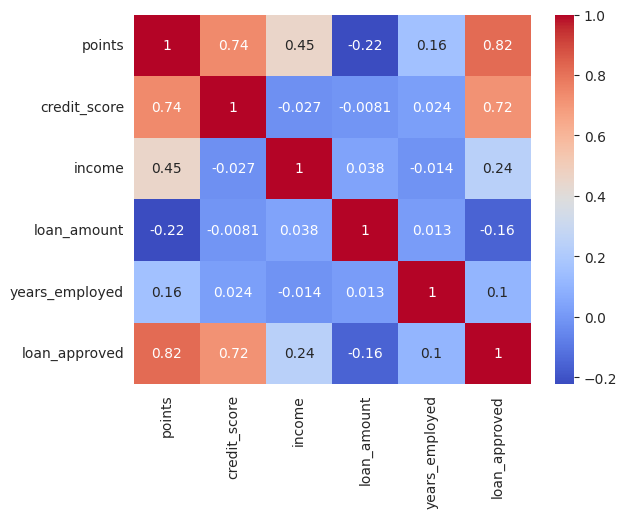

In [18]:
sns.heatmap(df_eda.corr(numeric_only=True), annot=True, cmap='coolwarm')


/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')
/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')


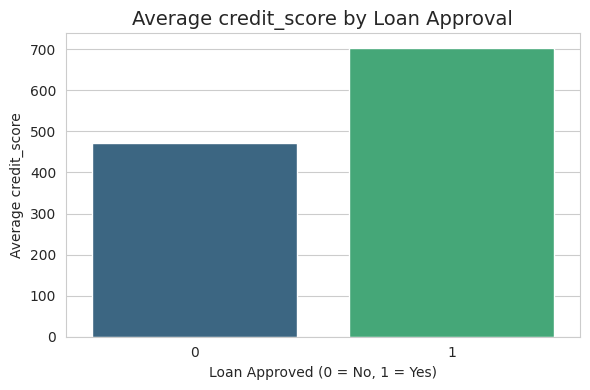

/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')
/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')


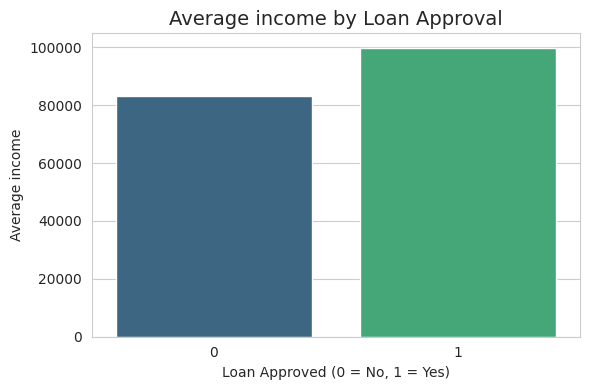

/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')
/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')


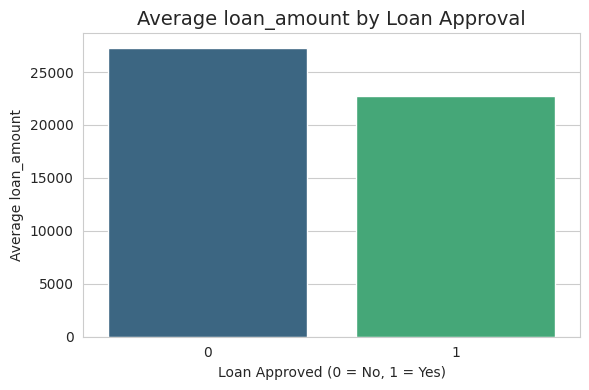

/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')
/tmp/ipykernel_697/2501189836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')


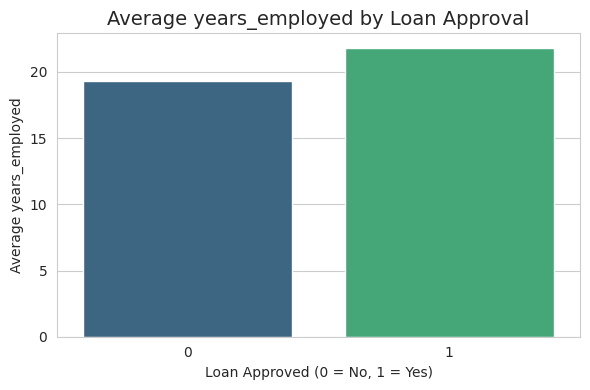

In [19]:
sns.set_style('whitegrid')

numeric_vars = df_eda.select_dtypes(include='int').columns.drop('loan_approved')

for col in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df_eda, x='loan_approved', y=col, estimator='mean', ci=None, palette='viridis')
    plt.title(f'Average {col} by Loan Approval', fontsize=14)
    plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
    plt.ylabel(f'Average {col}')
    plt.tight_layout()
    plt.show()

Discretize credit_score and points and Parallel plot

In [23]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np

credit_map = [-np.inf, 580, 670, 740, 800, np.inf]
points_map = [-np.inf, 40, 60, 80, np.inf]

disc = ArbitraryDiscretiser(binning_dict={
    'credit_score': credit_map,
    'points': points_map
})

df_disc = disc.fit_transform(df_eda.copy())

In [24]:
def make_label_map(binner_dict, variable):
    bins = binner_dict[variable]
    n_classes = len(bins) - 1
    classes_ranges = bins[1:-1]
    labels_map = {}
    for n in range(n_classes):
        if n == 0:
            labels_map[n] = f"<{classes_ranges[0]}"
        elif n == n_classes - 1:
            labels_map[n] = f"+{classes_ranges[-1]}"
        else:
            labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"
    return labels_map

for var in ['credit_score', 'points']:
    df_disc[var] = df_disc[var].replace(make_label_map(disc.binner_dict_, var))


In [28]:
%pip install plotly
import plotly.express as px

fig = px.parallel_categories(
    df_disc[['credit_score', 'points', 'income', 'loan_approved']],
    color="loan_approved",
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()


Note: you may need to restart the kernel to use updated packages.


The plot suggests:

Credit score and points are both positively correlated with loan approval.

Applicants with low credit score and low points have the highest rejection rates.

Applicants with high credit score and high points almost always get approved.